**Bank Note Authentication**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
columns = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"]
df = pd.read_csv('./Datasets/data_banknote_authentication.csv', names=columns)

In [32]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [35]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9854545454545455
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



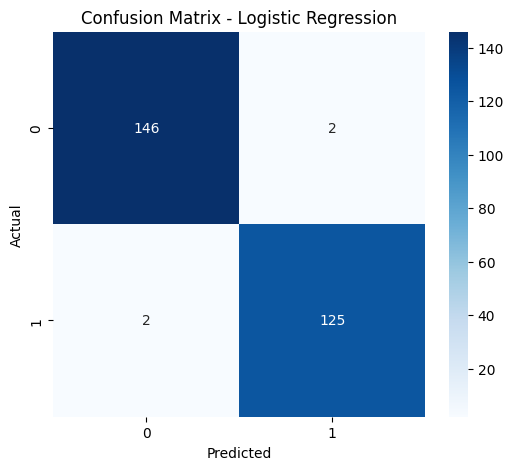

In [36]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [37]:
# Predict on new data
def predict_note_authentication(variance, skewness, kurtosis, entropy):
    sample = np.array([[variance, skewness, kurtosis, entropy]])
    prediction = log_model.predict(sample)
    return "Authentic" if prediction[0] == 1 else "Fake"

In [38]:
example_prediction = predict_note_authentication(2.3, -1.5, 3.1, -0.8)
print("Predicted Note Authentication:", example_prediction)

Predicted Note Authentication: Fake


c:\Users\KSHITIJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
